<a href="https://colab.research.google.com/github/CJTAYL/.github.io/blob/main/COVID_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Casting a Wider Net: Re-analysis of FiveThirtyEight Data



Analysis of data used by FiveThirtyEight to discuss how a South Carolina commmunity prepared for COVID-19. 

The data were retrieved from FiveThirtyEight's GitHub repository.

Link to the original article is provided below.

https://fivethirtyeight.com/features/how-one-high-risk-community-in-rural-south-carolina-is-bracing-for-covid-19/

In [14]:
# Packages used
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import io

# Set dots per inch for visualizations
plt.rcParams["figure.dpi"] = 300

# URL for raw data from FiveThirtyEight GitHub Repository
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/covid-geography/mmsa-icu-beds.csv"

# Code to download data from URL
download = requests.get(url).content

Hilton Head Island was used to guide cutoff points when filtering because it was the focus of the article.

In [15]:
# Data frame from downloaded CSV
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Filtering Data
df_filtered = df.loc[(df['total_percent_at_risk'] > '60.00') & (df['high_risk_per_ICU_bed'] > 3000) & (df['hospitals'] < 10)]
df_sorted = df_filtered.sort_values(by=['high_risk_per_ICU_bed'], ascending = False)

# Cleaning and Re-organizing Data
df_sorted.insert(1, "abbv", ["HH", "SP", "SA", "WF", "AB", "PO"], True)
df_sorted.insert(2, "high_risk_percent", [62.72, 66.12, 68.32, 67.11, 60.33, 60.60], True)

# Removing re-formatted column 
del df_sorted['total_percent_at_risk']

# Subset of dataframe to construct table using Plotly
df_table = df_sorted[['MMSA', 'abbv', 'icu_beds', 'hospitals']]

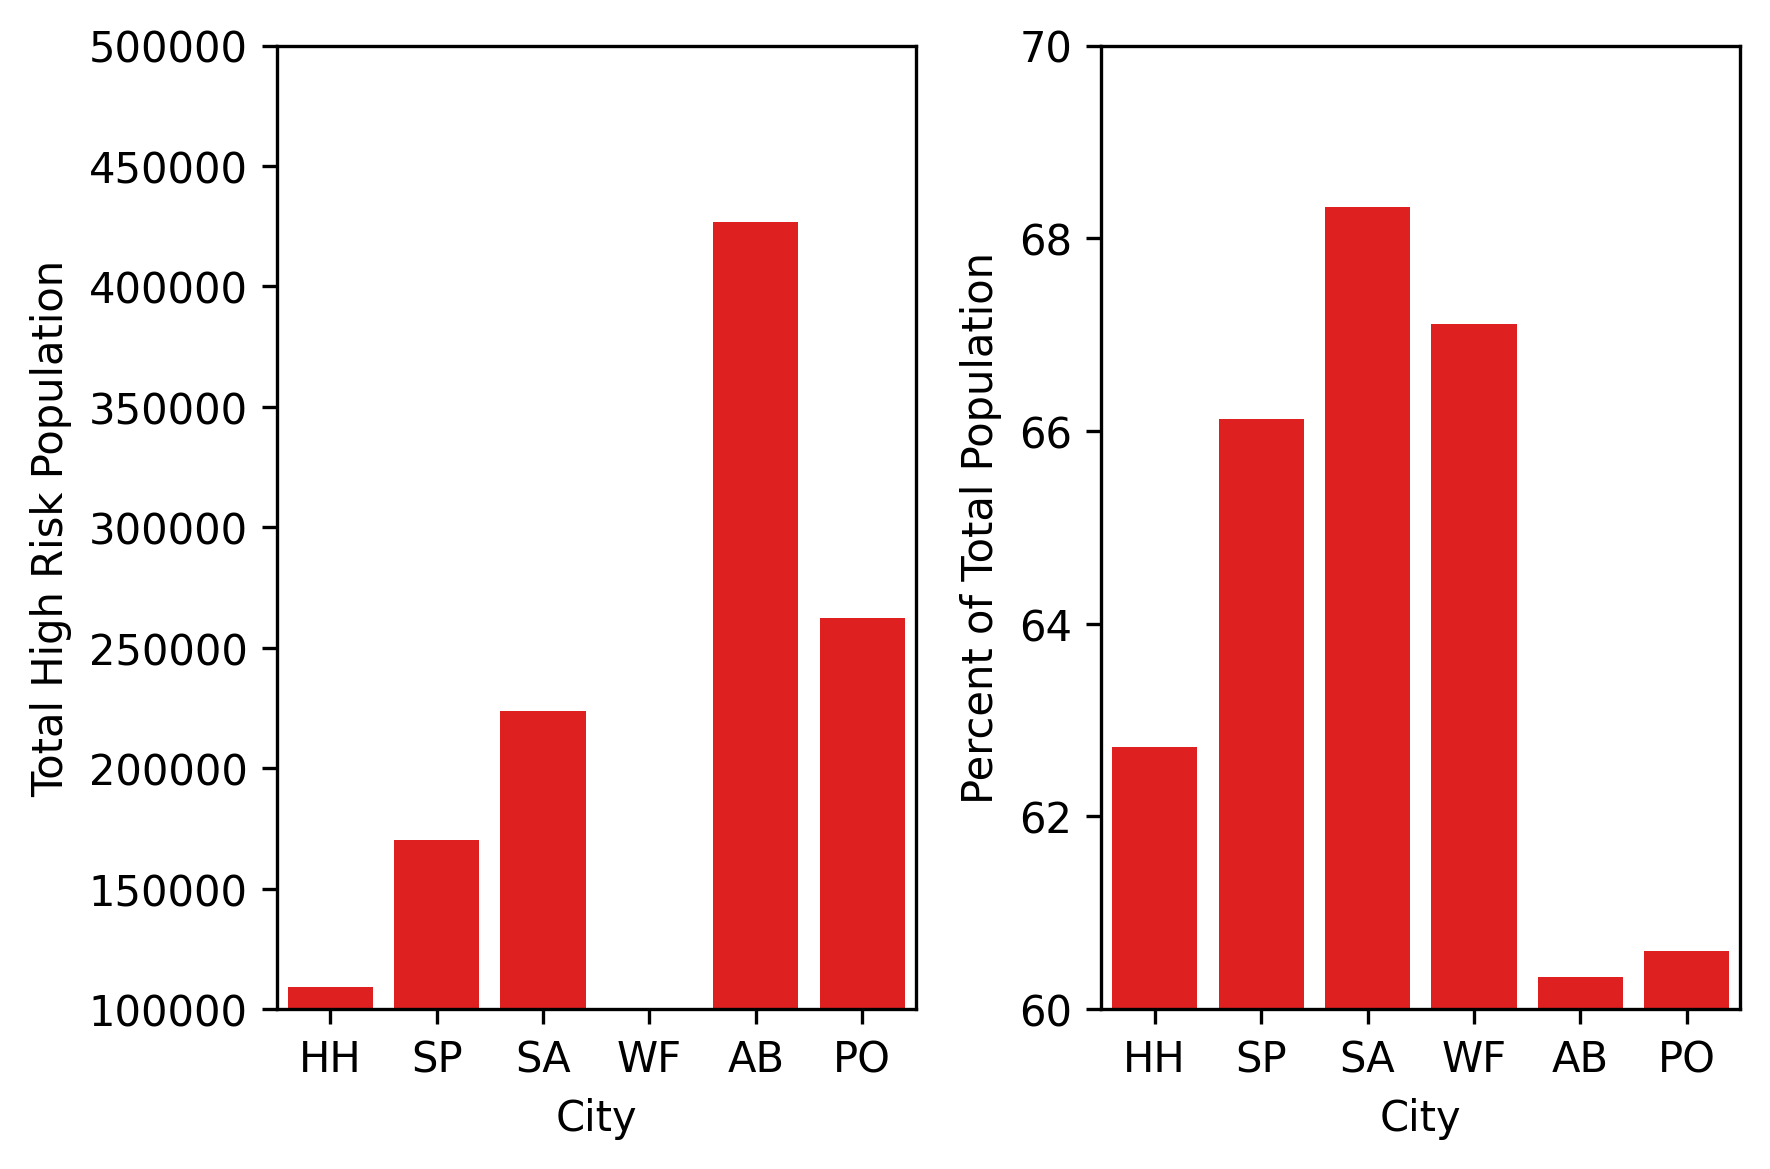

In [16]:
# Visualization for high risk populations across cities
fig, axes = plt.subplots(1, 2)
sns.barplot(ax=axes[0], x='abbv', y='total_at_risk', color='red', data=df_sorted)
axes[0].set_ylabel("Total High Risk Population")
axes[0].set_xlabel("City")
axes[0].set_ylim(100000, 500000)
sns.barplot(ax=axes[1], x='abbv', y='high_risk_percent', color='red', data=df_sorted)
axes[1].set_ylabel("Percent of Total Population")
axes[1].set_xlabel("City")
axes[1].set_ylim(60, 70)
plt.tight_layout()

Text(0.5, 0, 'City')

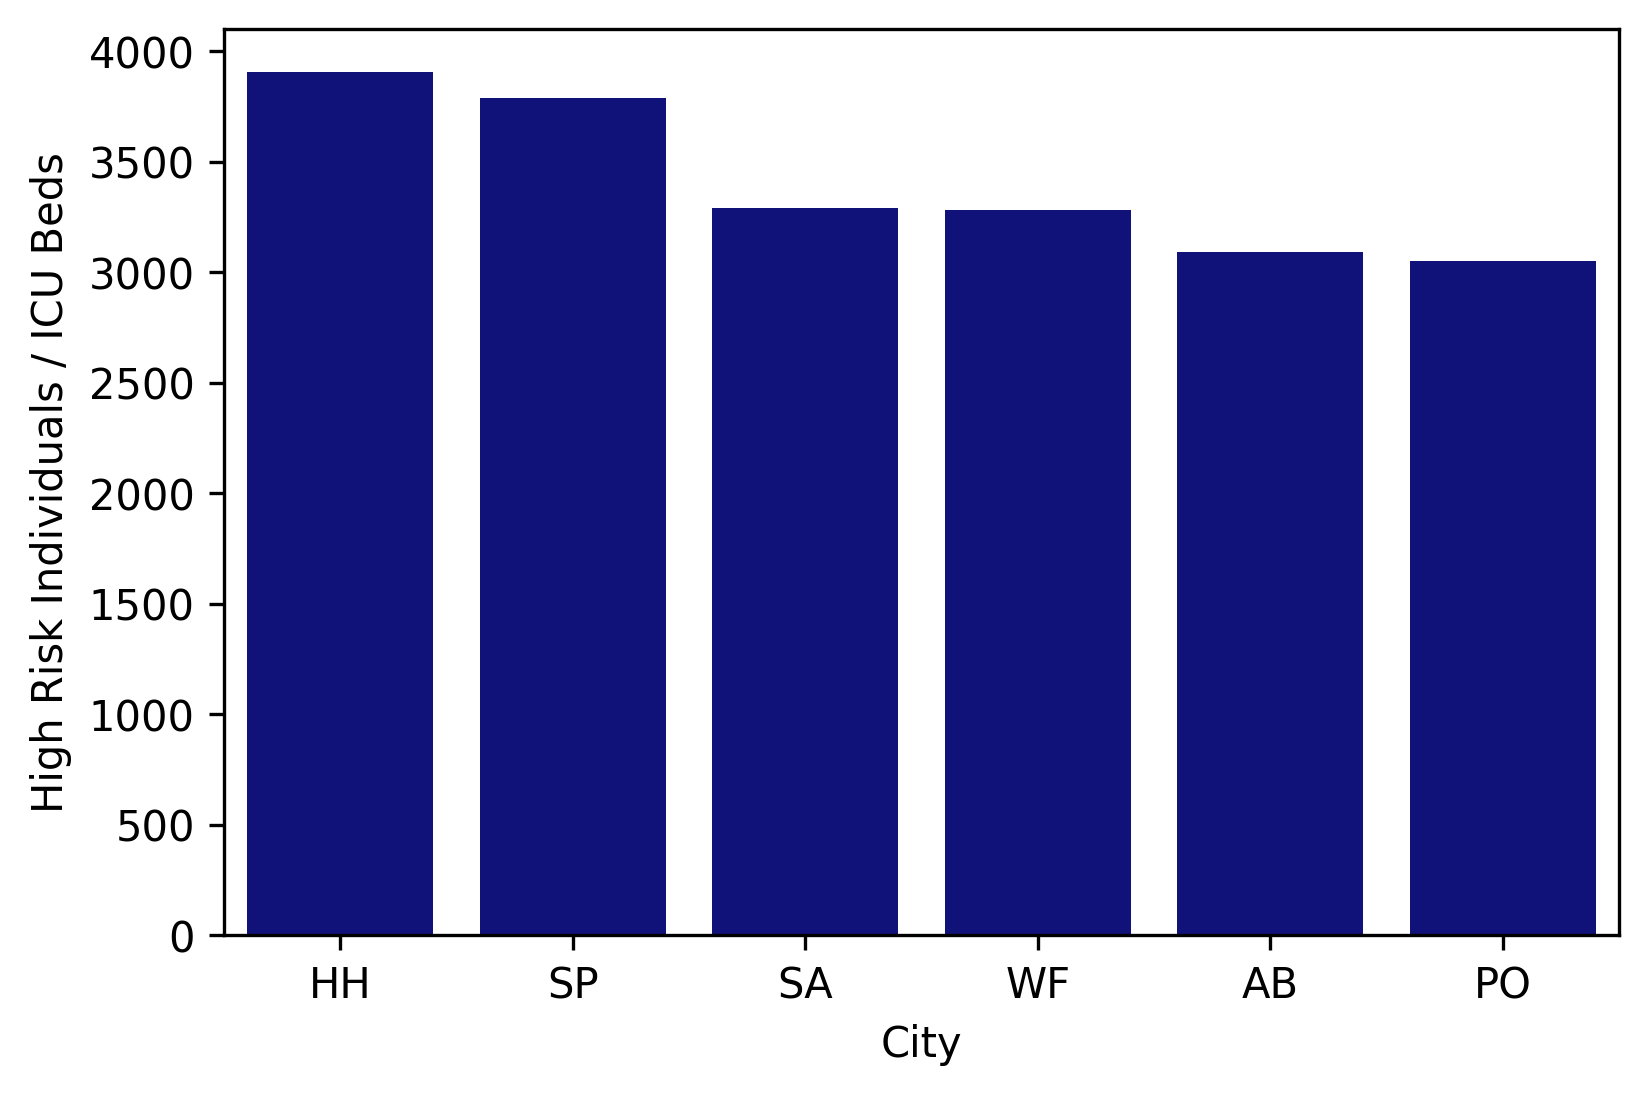

In [17]:
# Visualization for ICU Bed Data
sns.barplot(x='abbv', y='high_risk_per_ICU_bed', color='darkblue', data=df_sorted)
plt.ylabel("High Risk Individuals / ICU Beds")
plt.xlabel("City")

Text(0.5, 0, 'City')

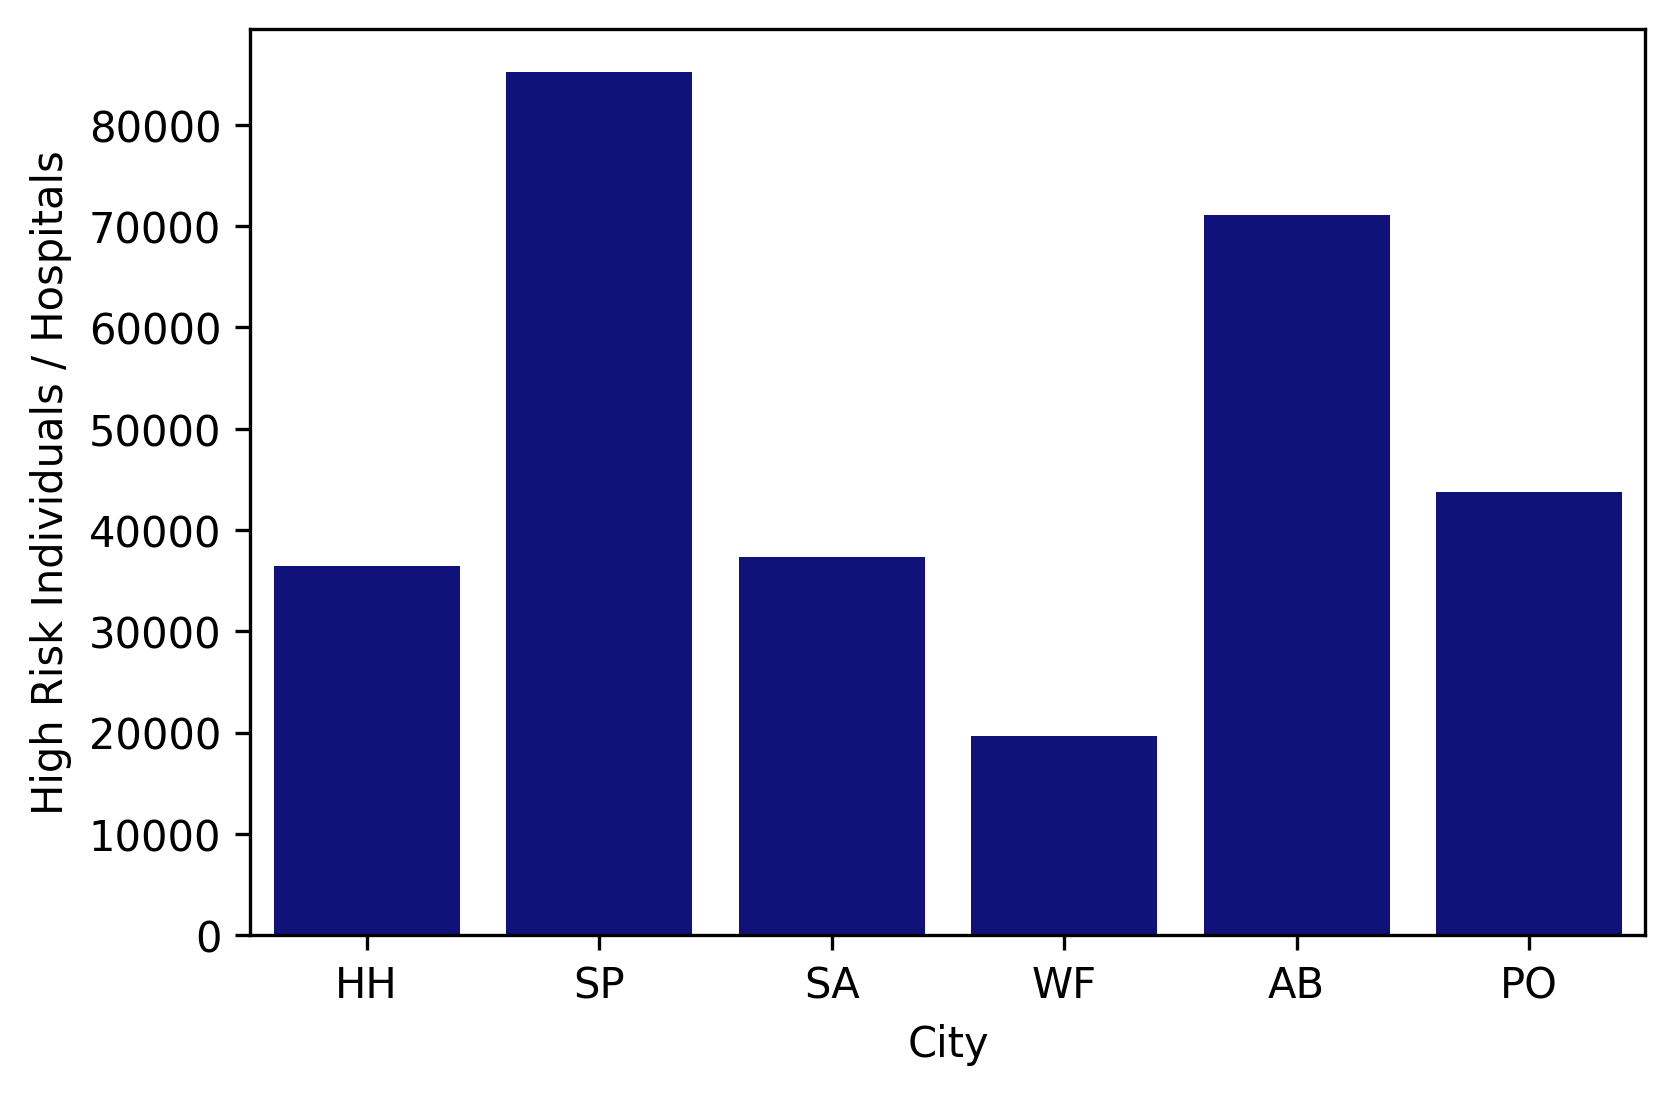

In [18]:
# Visualization for Hospital Data
sns.barplot(x='abbv', y='high_risk_per_hospital', color='darkblue', data=df_sorted)
plt.ylabel("High Risk Individuals / Hospitals")
plt.xlabel("City")